# Using NumPy arrays with one-dimensional data

## What is NumPy? 

Numerical Python (NumPy) is a Python library providing a fast and space-efficient data structure: the <code>ndarray</code>, a **homogeneous** array structure, indexed with integers.
The official documentation is <a href="http://www.numpy.org/">here</a>.

## Creating arrays

You can create an empty array. Simply import numpy and use following constructors: <code>array</code>, <code>arange</code>, <code>ones</code>, <code>zeros</code> or <code>empty</code>. 

In [11]:
import numpy as np # Everybody uses np as shorthand...
# Now we can create arrays from any sequence-like object:
L = [10, 5, 6, 8, -2]
T = (10, 5, 6, 9, -2)
a = np.array(L)
b = np.array(T)
print a
print b
print L
print T


[10  5  6  8 -2]
[10  5  6  9 -2]
[10, 5, 6, 8, -2]
(10, 5, 6, 9, -2)


In [6]:
# If you create it with empty, the values are arbitrary (not random, not necessarily zero).
nothing = np.empty(10)
nothing

array([  2.36470529e-316,   2.36471636e-316,   2.36469423e-316,
         2.36471913e-316,   2.36468869e-316,   2.36472190e-316,
         2.36472466e-316,   2.36472743e-316,   2.36473020e-316,
         2.36473296e-316])

You can create arrays based on the lenght of other arrays, e.g. with the <code>ones_like</code> function.

In [27]:
#Create an array of ones with the same lenght as this one:
L = [2, 3, 4, 6, 4, 3, 2]
b = np.ones(len(L))
a = np.ones_like(L)
a

array([1, 1, 1, 1, 1, 1, 1])

You can also create ranges with <code>arange</code>.

In [29]:
# Create an array with the even numbers 
# between (and including) 200 and 250.
a = np.arange(200, 251, 2)
a

array([200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224,
       226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250])

The function <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html">linspace</a> allows for controlling the amount of numbers to generate.

In [31]:
np.linspace(2.0, 3.0, num=5)

array([ 2.  ,  2.25,  2.5 ,  2.75,  3.  ])

## Arrays have types

The <code>dtype</code> attribut of an array returns the type of its elements.

In [32]:
ones = np.ones(5)
print type(ones[0])
print ones
print ones.dtype
print ones.itemsize

<type 'numpy.float64'>
[ 1.  1.  1.  1.  1.]
float64
8


NumPy arrays have a single element type for all its values. 

In [33]:
L = [1, 4.6, 5]
a = np.array(L)
print a.dtype

float64


We can **explicitly** indicate the type we want for a NumPy array.

In [34]:
#What happened with the numbers? 
L = [1, 4.6, 5]
a = np.array(L, dtype="int32")
print a.dtype
print a

int32
[1 4 5]


NumPy element types are not the same as the standard data types of Python. 

In [35]:
L = ["this", "is", "an", "array555rrrr"]
a = np.array(L)
print a.dtype
#TODO: Now interpret the type... look in the documentation of NumPy data types. 

|S12


You can convert the type of an array using <code>as_type</code> operation.

In [43]:
#Convert form float to int with astype:
a = np.array([5.7, 4.2, 3.0])
b = a.astype(np.int32)
print b

#Try to convert this array of strings to some kind of integer array:
a = np.array(["23", "12", "nan", "32", "10"])
print a
b = a.astype(np.int32)

[5 4 3]
['23' '12' 'nan' '32' '10']


ValueError: invalid literal for int() with base 10: 'nan'

## Vectorization!

In general, operations of arrays with scalars are **vectorized**, i.e. they are applied to each element.

In [44]:
x = np.ones(10)
x = x*2
print x

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


And if we apply operation between arrays of the same shape (size) they are applied element-wise.

In [45]:
y = np.ones(10)
y + x

array([ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.])

In [49]:
# Arrays need to be same size:
z = np.ones(5)
x+z

ValueError: operands could not be broadcast together with shapes (10,) (5,) 

Now an exercise!

In [50]:
# create an array of 20 numbers between 5 and 10 using a gamma distribution, print them 
# and later increase them in a 20% (you have to find the numpy function for that in the docs)
shape, scale = 2., 2. # mean and dispersion
r = np.random.gamma(shape, scale, 20)
print r
r = r*1.2
print r

[  4.97126193   4.41486042   7.74462929   3.65221973  10.29086191
   1.83767636   1.2485627    0.95501101   1.74086139   4.18677441
   5.50235232   2.04011017   7.15651825   0.64647967   2.65131201
   3.15518449   2.33808808   1.62067235   1.74704414   1.32644804]
[  5.96551431   5.29783251   9.29355515   4.38266367  12.3490343
   2.20521164   1.49827524   1.14601321   2.08903366   5.0241293
   6.60282278   2.4481322    8.58782189   0.7757756    3.18157441
   3.78622139   2.8057057    1.94480682   2.09645297   1.59173765]


## Basic graphing

You can use matplotlib as usual. Now let's generate more random numbers.

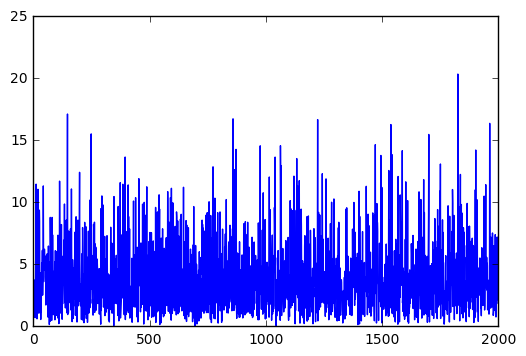

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
#Re-generate the previous array but with 2000 elements and plot it
r = np.random.gamma(shape, scale, 2000)
plt.plot(r)

But for plotting the histogram, you need to do it other way...

(array([ 17.,  43.,  39.,  46.,  71.,  78.,  62.,  84.,  76.,  64.,  80.,
         63.,  77.,  70.,  69.,  78.,  85.,  65.,  54.,  42.,  48.,  61.,
         57.,  40.,  30.,  30.,  42.,  32.,  27.,  21.,  25.,  22.,  18.,
         20.,  15.,  24.,  14.,  17.,  16.,  13.,   9.,  15.,   8.,  15.,
          9.,   9.,   9.,   6.,   8.,   7.,   7.,   4.,   2.,   4.,   7.,
          6.,   4.,   3.,   3.,   3.,   3.,   1.,   1.,   2.,   1.,   0.,
          1.,   4.,   0.,   2.,   1.,   3.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   1.,   1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  0.05180733,   0.25482403,   0.45784074,   0.66085744,
          0.86387414,   1.06689085,   1.26990755,   1.47292426,
          1.67594096,   1.87895767,   2.08197437,   2.28499107,
          2.48800778,   2.69102448,   2.89404119,   3.09705789,
          3.3000746 ,   3.5030913 ,   3.70610801,   3.90912471,

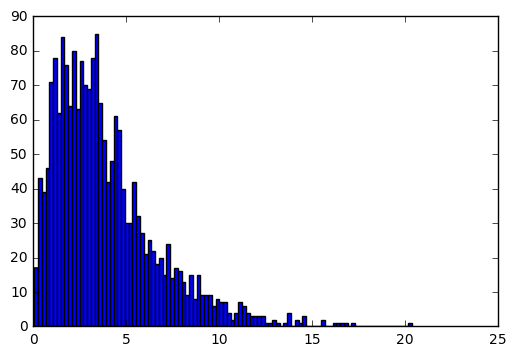

In [54]:
# TODO: Search in the docs of the pyplot object a way to plot a histogram. 
# You should particularly read what "bins" are as this influence the plotting of histograms. 
plt.hist(r, bins=100)

Check if this looks like a Gamma distribution with the given parameters :-)

## Using statistical libraries: analysis of variance

Create three arrays of the same size, two with a Gamma distribution, and one with an exponential distribution. Print their variances.

In [55]:
#Create three arrays of 200 random elements, two with Gamma and one exponential. 
# Print variances.
a = np.random.gamma(0.25, 0.3, 200)
b = np.random.gamma(0.3, 0.35, 200)
c = np.random.exponential(0.7, 200)
print a.var(), b.var(), c.var(), b.var()

0.0404185712036 0.0635200731325 0.506801334071 0.0635200731325


And now let's do the analysis of variance.

In [56]:
# Check analysis of variance between each pair of arrays and comment the results.
# Note and read the assumptions of ANOVA, to see if they fit in this case.
from scipy.stats import kruskal
# In the first case, the p-value is relatively high which means they do not have different medians. 
h_val, p_val = kruskal(a, b)
print h_val, p_val
# In the second case, the p-value is very low, which means we reject the null hypothesis that 
# they come from the same population...
h_val, p_val = kruskal(b, c)
print h_val, p_val

10.9398822943 0.000941161483012
156.103260599 8.03716422763e-36


Now do the same check with two random samples normally distributed...

## Indexing and slicing

You can index and slice numpy arrays just as you do with Python lists. If you assign a value to an slice, it gets propagated to all the cells.

In [59]:
#Create an array of ten ones, then slice the second half and set all the elements
#in the slice to zero.
o = np.ones(10)
print o
o[5:]=0
print o

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]


A very important aspect of slicing is that **it creates views, not copies**

In [60]:
#Create a slice of the four elements in the middle of the above array 
# and use a new variable to reference it.
# Then assign the value 2 to the new reference and print the original.
sl = o[3:7]
print sl
sl[:] = 4
print sl
z = sl.copy()
print o
print z

[ 1.  1.  0.  0.]
[ 4.  4.  4.  4.]
[ 1.  1.  1.  4.  4.  4.  4.  0.  0.  0.]
[ 4.  4.  4.  4.]


## Boolean arrays

You can use boolean expressions to get boolean arrays.

In [62]:
# Assign scores in a class of 15 students for two assignments.
# Create two arrays with the scores of the students using a normal distribution.
assig1 = np.random.normal(5, 2, 15)
assig2 = np.random.normal(5, 2, 15)

#TODO Round all the scores to one decimal. 
assig1 = assig1.round(1)
assig2 = assig2.round(1)
print assig1
print assig2

[ 3.7  4.   4.7  5.7  4.1  4.2  6.4  7.8  4.9  6.8  1.8  5.6  2.4  2.7  2.2]
[ 5.6  8.7  8.7  4.7  6.8  3.7  7.3  6.4  3.3  4.4  5.3  6.6  5.1  8.4  3.2]


In [63]:
assig1 >= 5

array([False, False, False,  True, False, False,  True,  True, False,
        True, False,  True, False, False, False], dtype=bool)

In [64]:
# Now let's think that only the students that passed the first assignment will 
# have the second considered.
# Get a boolean array for the students that passed the first assignement. 
passed1 = assig1 >= 5.0
print passed1

# Now get the mean of the two assignments per each of the students that passed the first one.
print ((assig2+assig1)/2)[passed1]

[False False False  True False False  True  True False  True False  True
 False False False]
[ 5.2   6.85  7.1   5.6   6.1 ]


## Playing with ufuncs

Universal functions (ufuncs) are vectorized operations on NumPy arrays. Let's plot some functions implemented with ufuncs. The complete list is here: http://docs.scipy.org/doc/numpy/reference/ufuncs.html 

50


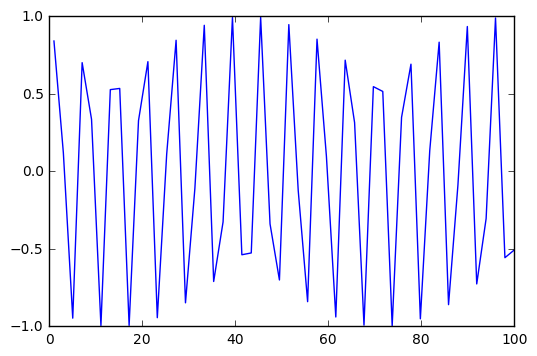

In [77]:
import numpy as np
#TODO: Create an array of 50 elements between 1 and 100 using linspace. Look
# at the documentation of this function.
x = np.linspace(1, 100)
print len(x)

# Get the sin of each of the generated points and plot them.
y = np.sin(x)
plt.plot(x,y)

You can plot several arrays in the same plot. 

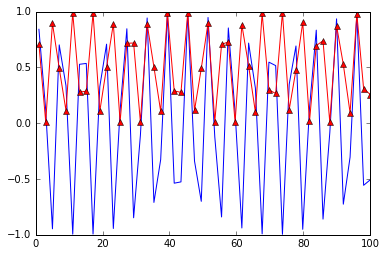

In [39]:
# TODO: Plot the same as above, plus the square of the sin values. 
# Look in the docs how you can pass more than one array to plot, and how to draw the second 
# with a different color, e.g. red.
plt.plot(x, y, x, y**2, 'r-^')

You can also generate random points and do scaterplotting

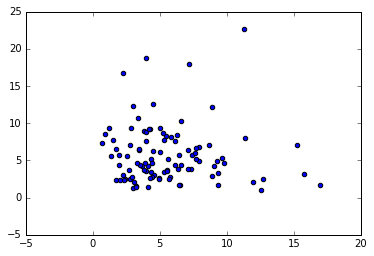

In [38]:
#TODO: generate two arrays of the same size using a random generator with gamma dstribution.
a = np.random.gamma(3,2, 100)
b = np.random.gamma(3,2, 100)

# Plot the two arrays as a scatterplot.
plt.scatter(a,b)

Summarization operations are implemented also.

In [ ]:
b.mean()

In [ ]:
np.sqrt(b)

This is a key reference:
http://wiki.scipy.org/Numpy_Example_List